# Анализ маркетинга Яндекс.Афиши

## Обзор файлов

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
visits = pd.read_csv('visits_log.csv')
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
orders = pd.read_csv('orders_log.csv')
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
costs = pd.read_csv('costs.csv')
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Во всех трех файлах по info() видно, что пропущенных значений нет. Для приличия проверим на дубли, хотя в двух первых файлах есть уникальный Uid(по условиям задачи), а файле costs теоретически могут быть одинаковые записи.

In [8]:
visits.duplicated().sum()

0

In [9]:
orders.duplicated().sum()

0

In [10]:
costs.duplicated().sum()

0

Во всех файлах переведем названия столбцов в нижний регистр и даты переведем в тип даты

In [11]:
visits.set_axis(['device','end_ts','source_id','start_ts','uid'],axis='columns',inplace=True)
visits['end_ts']=pd.to_datetime(visits['end_ts'],format="%Y-%m-%d %H:%M")
visits['start_ts']=pd.to_datetime(visits['start_ts'],format="%Y-%m-%d %H:%M")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [12]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Уберем записи, не входящие в заданный диапазон.

In [13]:
orders.set_axis(['buy_ts','revenue','uid'],axis='columns',inplace=True)
orders['buy_ts']=pd.to_datetime(orders['buy_ts'],format="%Y-%m-%d %H:%M")
orders = orders[orders['buy_ts'] <= '2018-05-31']

Есть немного покупок с нулевой суммой (51), возможно за бонусы, хотя в задании есть вопрос о количестве покупок, они большого  влияния не окажут, поэтому их удаляем.

In [14]:
orders = orders[orders['revenue']!=0]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49753 entries, 0 to 49803
Data columns (total 3 columns):
buy_ts     49753 non-null datetime64[ns]
revenue    49753 non-null float64
uid        49753 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


In [15]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [16]:
costs['dt']=pd.to_datetime(costs['dt'],format="%Y-%m-%d")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [17]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Проверим, нет ли нулевых сессий?


In [18]:
visits['len_ts'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.query('len_ts == 0')

,device,end_ts,source_id,start_ts,uid,len_ts
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0
28,desktop,2017-11-09 15:53:00,4,2017-11-09 15:53:00,17892541477379911957,0
32,desktop,2017-11-30 12:29:00,4,2017-11-30 12:29:00,13410401624913285510,0
54,desktop,2018-02-23 16:52:00,10,2018-02-23 16:52:00,13423278602430425332,0
...,...,...,...,...,...,...
358511,desktop,2017-09-15 11:31:00,4,2017-09-15 11:31:00,6406595666419694649,0
358514,desktop,2018-01-16 23:57:00,5,2018-01-16 23:57:00,6457848932283204350,0
358522,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,0
358524,touch,2018-01-18 13:38:00,4,2018-01-18 13:38:00,4558073034499185861,0


Как ни удивительно, но почти 10% с нулевой продолжительностью, придется их убрать, также посмотрим выбросы

In [19]:
visits['len_ts'].max()

84480

In [20]:
visits['len_ts'].quantile(0.99)

4500.0

In [21]:
visits.query('len_ts >= 4500')

,device,end_ts,source_id,start_ts,uid,len_ts
19,desktop,2018-05-17 19:26:00,2,2018-05-17 18:10:00,14243397340327062268,4560
201,desktop,2017-06-29 12:19:00,2,2017-06-29 10:40:00,13888745432979765063,5940
474,desktop,2017-11-15 12:45:00,2,2017-11-15 11:03:00,17649287249444736221,6120
674,desktop,2017-07-19 19:43:00,1,2017-07-19 18:13:00,9534697107484505257,5400
728,desktop,2017-11-23 21:25:00,4,2017-11-23 20:07:00,4662989186148111156,4680
...,...,...,...,...,...,...
357701,desktop,2017-11-28 16:17:00,1,2017-11-28 14:33:00,11402565573329395669,6240
357996,desktop,2018-01-29 16:41:00,1,2018-01-29 15:18:00,15325741652986622553,4980
358399,desktop,2017-07-20 20:08:00,1,2017-07-20 17:31:00,9534697107484505257,9420
358433,touch,2017-12-17 16:56:00,2,2017-12-17 15:09:00,11668998529606949896,6420


4500 сек - это час с четвертью, таких записей 1%, уберем как выбросы. Скорее всего пользователь открыл окно и долго не закрывал, хотя непосредственно с сервисом уже не работал.

In [22]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 6 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
len_ts       359400 non-null int64
dtypes: datetime64[ns](2), int64(2), object(1), uint64(1)
memory usage: 16.5+ MB


In [23]:
visits2=visits.copy()

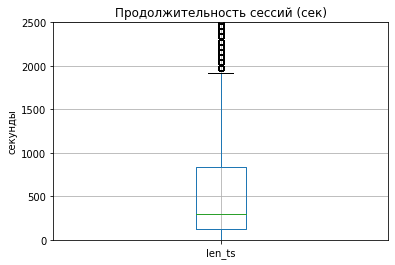

In [24]:
visits['len_ts'].to_frame().boxplot()
plt.ylim(0,2500) 
plt.title('Продолжительность сессий (сек)')
plt.ylabel('секунды')
plt.show()

По этому графику видно,что основная масса сессий не превышает 16 минут, но кто-то может долго изучает ассортимент.

**Заключение по разделу :** Были проверены файлы на корректность, поля с датами переведены в тип даты, удалены нулевые и очень долгие сессии, удалены записи, не входящие в заданный диапазон.

## Расчет метрик

### Продуктовые метрики

#### Пользователькая активность

По файлу visits посмотрим пользовательскую активность по различным периодам:

In [25]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date



Сгруппируем данные по уникальным пользователям и найдём среднее. Расчитаем метрики. Количество уникальных пользователей. DAU,WAU,MAU. 

In [26]:
dau = int(visits.groupby('session_date').agg({'uid': 'nunique'}).mean())
wau =int(visits.groupby(['session_year','session_week']).agg({'uid': 'nunique'}).mean())
mau = int(visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'}).mean())
print('DAU =',dau) 
print('WAU =',wau)
print('MAU =',mau)

DAU = 907
WAU = 5716
MAU = 23228


Средняя величина метрик растет, это хороший признак

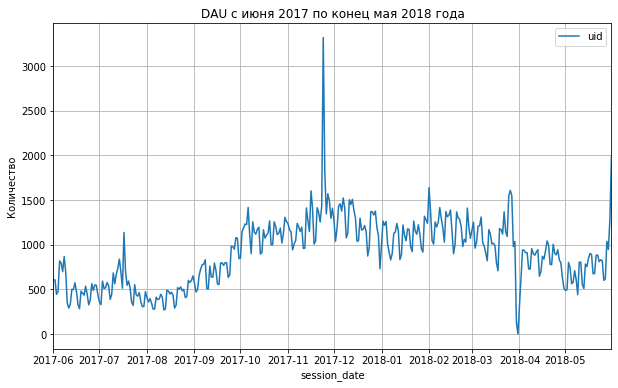

In [27]:
(visits.groupby('session_date').agg({'uid': 'nunique'})).plot(figsize=(10,6),grid=True).set_title('DAU с июня 2017 по конец мая 2018 года' )
plt.ylabel('Количество')
plt.show()

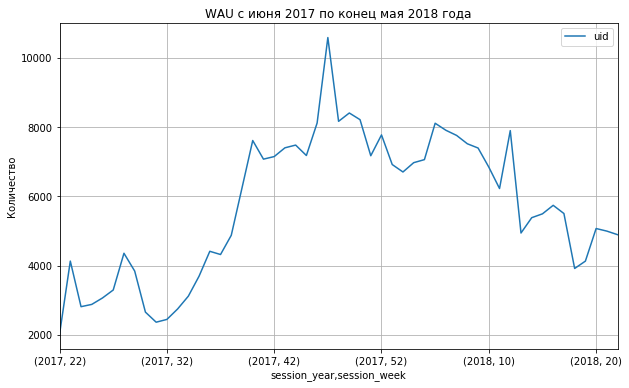

In [28]:
(visits.groupby(['session_year','session_week']).agg({'uid': 'nunique'})).plot(figsize=(10,6),grid=True).set_title('WAU с июня 2017 по конец мая 2018 года' )
plt.ylabel('Количество')
plt.show()

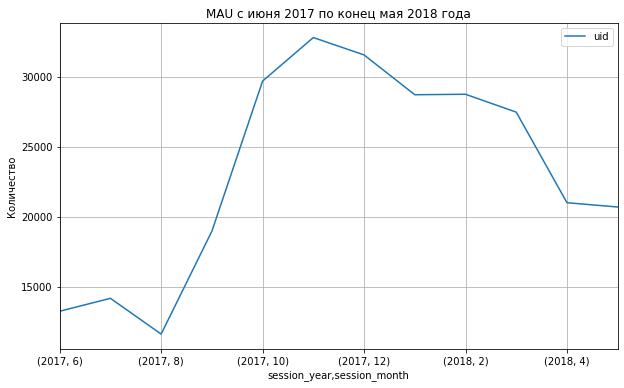

In [29]:
(visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'})).plot(figsize=(10,6),grid=True).set_title('MAU с июня 2017 по конец мая 2018 года' )
plt.ylabel('Количество')
plt.show()

 Если посмотреть на графики, то можно сделать следующие выводы (предположения). На графике по дням, при общем среднем уровне имеются 2 всплеска в декабре17 в плюс и в в апреле18 в минус. Можно предположить, что в декабре были какие-то рекламные акции или люди просто покупали билеты на новогодние представления. А в апреле, видимо, люди вместо концертов дружно поехали на природу или просто сервер был на профилактике. На недельном графике картина более сглажена, но эти пики прослеживаются. То же самое сохраняется на помесячном графике и на нем видно, что в общем за годовой период посещаемось выросла, если сравнить 01.06.2017 и 31.05.2018. Хотя минимум июль-август, скорее всего, связан с сезоном отпусков,а пик в середине периода обусловлен локальным всплеском посещений перед Новым годом.  

Посмотрим регулярность использования сервиса по sticky factor 

In [30]:
print('sticky factor = DAU/WAU {:.2f}'.format(dau/wau ))
print('sticky factor = DAU/MAU {:.2f}'.format(dau/mau )) 

sticky factor = DAU/WAU 0.16
sticky factor = DAU/MAU 0.04


#### Количество сессий в день

Посмотрим, сколько в среднем за день пользователи заходят на сайт

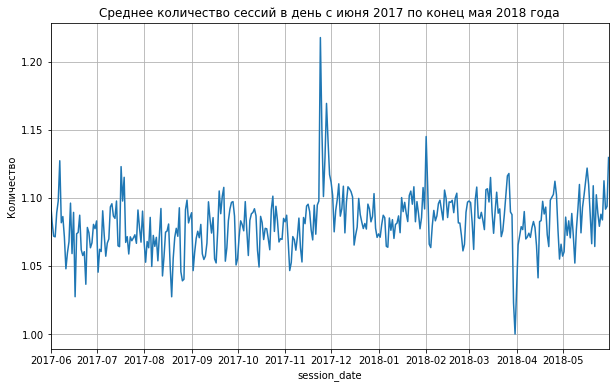

In [31]:
sessions_per_day = visits.groupby(['session_date']).agg({'uid': ['count', 'nunique']})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sessions_per_day'] = (sessions_per_day['n_sessions'] / sessions_per_day['n_users'])
sessions_per_day['sessions_per_day'].plot(figsize=(10,6),grid=True).set_title('Среднее количество сессий в день с июня 2017 по конец мая 2018 года' )
plt.ylabel('Количество')
plt.show()

По графику видим, что среднее количество подключений согласуется с графиком DAU активности пользователей, причем несмотря на то, что в течение года количество пользователей росло, среднее количество сессий в день не меняется. 

посмотрим количество подключений по людям

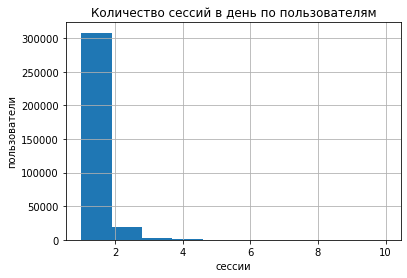

In [32]:
sessions_for_one=visits.groupby(['session_date','uid']).agg({'start_ts': ['count', 'nunique']})
sessions_for_one.columns = ['n_sessions', 'n_users']
sessions_for_one['n_sessions'].hist().set_title('Количество сессий в день по пользователям')
plt.xlabel('сессии')
plt.ylabel('пользователи')
plt.show()

По гистограмме видно, что очень редко, кто в день подключается больше одного раза. 

####  Продолжительность сессии (ASL)

Определим ASL в секундах

In [33]:
visits['len_ts'].mean()

643.506488592098

Посмотрим гистограмму

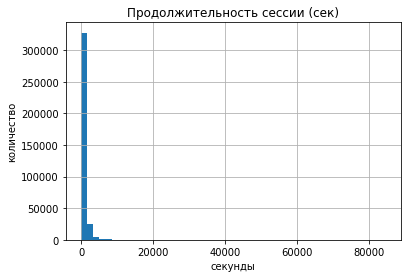

In [34]:
visits['len_ts'].hist(bins=50).set_title('Продолжительность сессии (сек)')
plt.xlabel('секунды')
plt.ylabel('количество')
plt.show()

Продолжительность типичной пользовательской сессии в секундах

In [35]:
visits['len_ts'].mode()

0    60
dtype: int64

Несмотря на то, что средняя длительность сессии 10 мин, наиболее частая - 60 сек. 

#### Retention Rate

Создадим когорты. В задании требуется посчитать Retention Rate на второй месяц, значит когорты создаем по месяцам.

In [36]:
first_start_date = visits.groupby('uid')['start_ts'].min()
first_start_date.name = 'first_start_date'
visits = visits.join(first_start_date, on='uid')
visits.head()


,device,end_ts,source_id,start_ts,uid,len_ts,session_year,session_month,session_week,session_date,first_start_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,12,51,2017-12-20,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2,8,2018-02-19,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,7,26,2017-07-01,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,12,52,2017-12-27,2017-12-27 14:06:00


Добавим столбцы с месяцами

In [37]:
visits['first_start_month'] = visits['first_start_date'].astype('datetime64[M]')
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,len_ts,session_year,session_month,session_week,session_date,first_start_date,first_start_month,start_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0,2017,12,52,2017-12-27,2017-12-27 14:06:00,2017-12-01,2017-12-01


Посчитаем первоначальное количество людей в когорте

In [38]:
cohort_grouped = visits.groupby('first_start_month').agg({'uid': 'nunique'}).reset_index()
cohort_grouped.columns = ['first_start_month','count_users']
cohort_grouped

,first_start_month,count_users
0,2017-06-01,13259
1,2017-07-01,13140
2,2017-08-01,10181
3,2017-09-01,16704
4,2017-10-01,25977
5,2017-11-01,27248
6,2017-12-01,25268
7,2018-01-01,22624
8,2018-02-01,22197
9,2018-03-01,20589


Добавим столбец с "временем жизни"

In [39]:
visits['cohort_lifetime'] = (visits['start_month'] - visits['first_start_month'])
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 

In [40]:
cohorts = visits.groupby(['first_start_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts.columns = ['first_start_month','cohort_lifetime','count_users_new']
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
first_start_month    78 non-null datetime64[ns]
cohort_lifetime      78 non-null int64
count_users_new      78 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.0 KB


In [41]:
cohorts = cohorts.merge(cohort_grouped,on='first_start_month') 
cohorts.head(12)

,first_start_month,cohort_lifetime,count_users_new,count_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
5,2017-06-01,5,947,13259
6,2017-06-01,6,809,13259
7,2017-06-01,7,766,13259
8,2017-06-01,8,694,13259
9,2017-06-01,9,674,13259


<a class="anchor" id="33-bullet">

Добавим столбец с Retention Rate 

In [42]:
cohorts['retention_rate'] = cohorts['count_users_new']/cohorts['count_users'] 
cohorts

,first_start_month,cohort_lifetime,count_users_new,count_users,retention_rate
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [43]:
cohorts['first_start_month'] = cohorts['first_start_month'].dt.strftime('%Y-%m')

In [44]:
retention_pivot = cohorts.pivot_table(
    index='first_start_month',
    columns='cohort_lifetime',
    values='retention_rate',
    aggfunc='sum'
) 
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_start_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


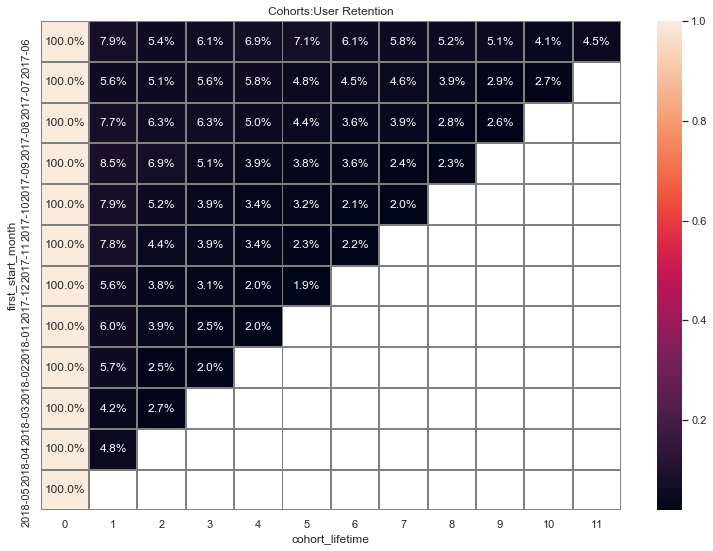

In [45]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts:User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 


Для наглядности уберем первую колонку, которая по определению должна дать 100%. Тем не менее,четко видно постепенное снижение активности.

In [46]:
cohorts2 = cohorts[cohorts['cohort_lifetime']>0]
retention_pivot2 = cohorts2.pivot_table(
    index='first_start_month',
    columns='cohort_lifetime',
    values='retention_rate',
    aggfunc='sum'
)
retention_pivot2

cohort_lifetime,1,2,3,4,5,6,7,8,9,10,11
first_start_month,,,,,,,,,,,
2017-06,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


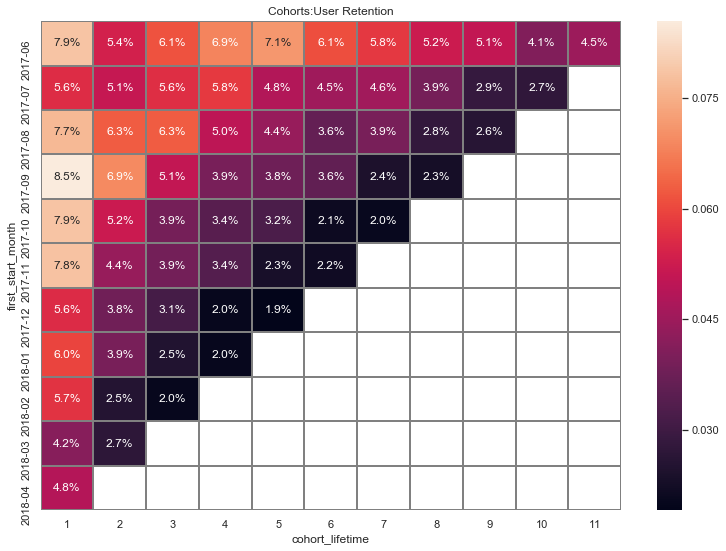

In [47]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts:User Retention')
sns.heatmap(retention_pivot2, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 


По всем когортам прослеживается резкий спад во втором месяце, что не удивительно. Первый месяц потому и первый, что пользователь  подключлся и выполнил какие-то действия, а далее обращается от случая к случаю. Причем самой стабильной оказалась самая ранняя когорта, а в остальных идет постепенное снижение. То есть в абсолютном  выражении наблюдается постепенный отток.

In [48]:
cohorts2 =cohorts[cohorts['cohort_lifetime'] == 1]
cohorts2

,first_start_month,cohort_lifetime,count_users_new,count_users,retention_rate
1,2017-06,1,1043,13259,0.078664
13,2017-07,1,737,13140,0.056088
24,2017-08,1,783,10181,0.076908
34,2017-09,1,1428,16704,0.085489
43,2017-10,1,2042,25977,0.078608
51,2017-11,1,2133,27248,0.078281
58,2017-12,1,1410,25268,0.055802
64,2018-01,1,1351,22624,0.059715
69,2018-02,1,1267,22197,0.057080
73,2018-03,1,861,20589,0.041818


Посчитаем средний Retention Rate на второй месяц "жизни" когорт 

In [49]:
cohorts2['retention_rate'].mean()

0.06516659710392834

Средний  Retention Rate по всем когортам 9.1%

#### Churn Rate

Посмотрим Churn Rate по когортам

In [50]:
cohorts['churn_rate'] = cohorts.groupby(['first_start_month'])['count_users_new'].pct_change()
cohorts

,first_start_month,cohort_lifetime,count_users_new,count_users,retention_rate,churn_rate
0,2017-06,0,13259,13259,1.000000,NaN
1,2017-06,1,1043,13259,0.078664,-0.921336
2,2017-06,2,713,13259,0.053775,-0.316395
3,2017-06,3,814,13259,0.061392,0.141655
4,2017-06,4,909,13259,0.068557,0.116708
...,...,...,...,...,...,...
73,2018-03,1,861,20589,0.041818,-0.958182
74,2018-03,2,557,20589,0.027053,-0.353078
75,2018-04,0,15709,15709,1.000000,NaN
76,2018-04,1,760,15709,0.048380,-0.951620


In [51]:
churn_pivot = cohorts.pivot_table(
    index='first_start_month',
    columns='cohort_lifetime',
    values='churn_rate',
    aggfunc='sum',
)
churn_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_start_month,,,,,,,,,,,,
2017-06,0.0,-0.921336,-0.316395,0.141655,0.116708,0.041804,-0.145723,-0.053152,-0.093995,-0.028818,-0.200297,0.105751
2017-07,0.0,-0.943912,-0.085482,0.094955,0.036585,-0.172549,-0.058452,0.008389,-0.151414,-0.262745,-0.039894,NaN
2017-08,0.0,-0.923092,-0.182631,-0.001563,-0.201878,-0.121569,-0.174107,0.086486,-0.293532,-0.066901,NaN,NaN
2017-09,0.0,-0.914511,-0.190476,-0.267301,-0.223140,-0.039514,-0.052215,-0.325543,-0.056931,NaN,NaN,NaN
2017-10,0.0,-0.921392,-0.335455,-0.254237,-0.120553,-0.059551,-0.336918,-0.046847,NaN,NaN,NaN,NaN
2017-11,0.0,-0.921719,-0.436474,-0.123128,-0.128083,-0.305767,-0.068966,NaN,NaN,NaN,NaN,NaN
2017-12,0.0,-0.944198,-0.319149,-0.181250,-0.348601,-0.060547,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.0,-0.940285,-0.341229,-0.365169,-0.189381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.0,-0.942920,-0.554065,-0.210619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


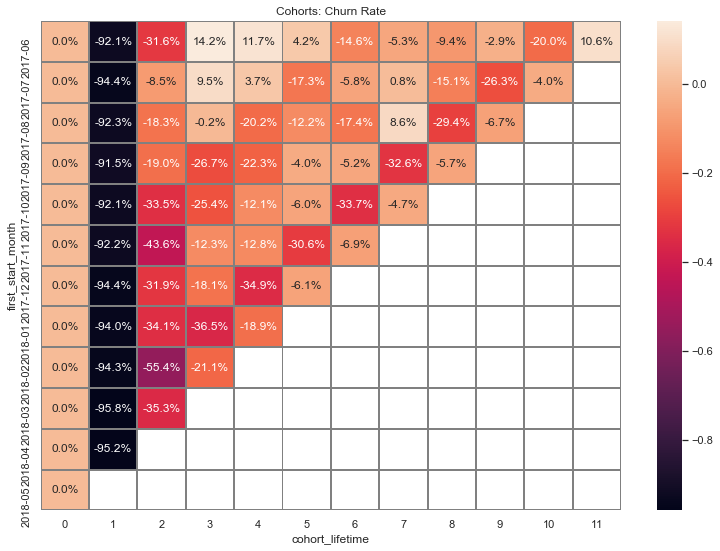

In [52]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Churn Rate')
sns.heatmap(churn_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray') 


Если посмотреть в относительном выражении, то все выглядит не так плохо. Есть какой-то плюс/минус стабильный спрос. И если посмотреть по диагональкам (соответствие определенному месяцу), то в "стареньких" когортах наблюдается увеличение спроса в некоторых месяцах. Можно предположить, что это связано либо с какими-то "плюшками", либо с интересными событиями, которые хочется посетить. 

**Заключение по разделу продуктовые метрики:**  В разделе были рассчитаны  метрики:  DAU,WAU,MAU,sticky factor, ASL, Retention Rate, Churn Rate; созданы графики и таблицы по файлам посещений м заказов. Сделаны предварительные предположения описания поведения пользователей.

### Метрики электронной коммерции

#### Период до первой покупки

Посмотрим, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

Соединим столбцы первых посещения и заказов

In [53]:
waiting_buy =pd.DataFrame() 
waiting_buy['first_visit_ts'] = first_start_date
first_order_date=orders.groupby('uid')['buy_ts'].min()
first_order_date.name ='first_buy_ts'
waiting_buy =waiting_buy.join(first_order_date, on = 'uid') 
waiting_buy

,first_visit_ts,first_buy_ts
uid,,
11863502262781,2018-03-01 17:27:00,NaT
49537067089222,2018-02-06 15:55:00,NaT
297729379853735,2017-06-07 18:47:00,NaT
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
325320750514679,2017-09-30 14:29:00,NaT
...,...,...
18446403737806311543,2017-11-30 03:36:00,NaT
18446424184725333426,2017-12-06 20:32:00,NaT
18446556406699109058,2018-01-01 16:29:00,NaT


посчитаем пропуски

In [54]:
waiting_buy.isnull().sum()

first_visit_ts         0
first_buy_ts      192153
dtype: int64

Оказывается 192153/228169 = 84% пользователей вообще ничего не покупают, а только смотрят, используя приложение как справочную систему 

In [55]:
waiting_buy.dropna(inplace = True)
waiting_buy

,first_visit_ts,first_buy_ts
uid,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...
18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00


Посчитаем среднее время между первым посещением и первой покупкой

In [56]:
waiting_buy['delta'] = waiting_buy['first_buy_ts'] - waiting_buy['first_visit_ts']
waiting_buy['delta'].sort_values()

uid
5592792316590685478      0 days 00:00:00
12590971420513456932     0 days 00:00:00
14936146602264322266     0 days 00:00:00
14935194345617227296     0 days 00:00:00
2344130227652686166      0 days 00:00:00
                              ...       
2571629626051066012    355 days 22:43:00
6079087450327100134    357 days 01:10:00
4044684955900748187    357 days 05:23:00
12282157960125853781   357 days 07:31:00
15758490655816676033   362 days 16:47:00
Name: delta, Length: 36016, dtype: timedelta64[ns]

Text(0, 0.5, 'количество')

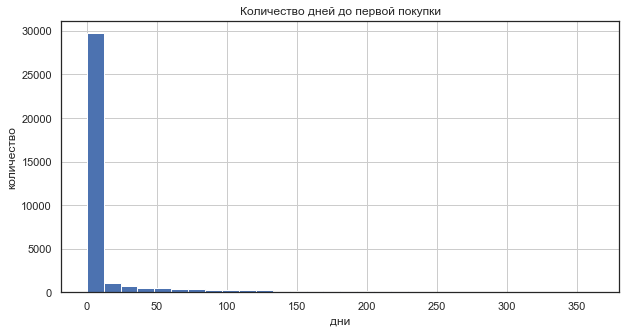

In [57]:
waiting_buy['delta'].dt.days.hist(bins=30,figsize=(10,5)).set_title('Количество дней до первой покупки')
plt.xlabel('дни')
plt.ylabel('количество')

Разброс от нуля  до почти года. Посчитаем среднее: 

In [58]:
mean_time = waiting_buy['delta'].dt.days.mean()
'Среднее время',mean_time.round(), 'дней'

('Среднее время', 17.0, 'дней')

In [59]:
mode_time =waiting_buy['delta'].dt.seconds.mode()
print('Самое частое время', mode_time.round() ,'секунд')

Самое частое время 0    60
dtype: int64 секунд


Хотя среднее 17 дней, чаще всего затрачивается 60 секунд

#### Количество покупок на одного покупателя

Рассчитаем среднее количество покупок на одного покупателя за за 6 месяцев, добавим первоначальное количество людей в когорте

In [60]:
orders

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
49799,2018-05-30 23:38:00,1.10,15260920301052888366
49800,2018-05-30 23:40:00,0.37,5551662730948864339
49801,2018-05-30 23:46:00,3.36,2570770084478314062
49802,2018-05-30 23:53:00,1.16,18378864100483916241


In [61]:
orders = orders.join(first_start_date, on='uid')
orders

,buy_ts,revenue,uid,first_start_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00
...,...,...,...,...
49799,2018-05-30 23:38:00,1.10,15260920301052888366,2018-05-30 23:37:00
49800,2018-05-30 23:40:00,0.37,5551662730948864339,2018-05-30 23:36:00
49801,2018-05-30 23:46:00,3.36,2570770084478314062,2018-05-30 23:35:00
49802,2018-05-30 23:53:00,1.16,18378864100483916241,2018-05-30 23:42:00


In [62]:
orders['first_start_month'] = orders['first_start_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,first_start_date,first_start_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,2017-06-01


In [63]:
buyers_grouped = orders.groupby('first_start_month').agg({'uid': 'nunique'}).reset_index()
buyers_grouped.columns = ['first_start_month','count_users']
buyers_grouped

,first_start_month,count_users
0,2017-06-01,2919
1,2017-07-01,2450
2,2017-08-01,1715
3,2017-09-01,3051
4,2017-10-01,4669
5,2017-11-01,4254
6,2017-12-01,4061
7,2018-01-01,3115
8,2018-02-01,3176
9,2018-03-01,2835


In [64]:
orders = orders.merge(buyers_grouped,on='first_start_month')
orders

,buy_ts,revenue,uid,first_start_date,first_start_month,order_month,count_users
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01,2919
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,2017-06-01,2919
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,2017-06-01,2919
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,2017-06-01,2919
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,2017-06-01,2919
...,...,...,...,...,...,...,...
49748,2018-05-30 23:34:00,0.37,3910948490794393283,2018-05-30 23:29:00,2018-05-01,2018-05-01,1889
49749,2018-05-30 23:38:00,1.10,15260920301052888366,2018-05-30 23:37:00,2018-05-01,2018-05-01,1889
49750,2018-05-30 23:40:00,0.37,5551662730948864339,2018-05-30 23:36:00,2018-05-01,2018-05-01,1889
49751,2018-05-30 23:46:00,3.36,2570770084478314062,2018-05-30 23:35:00,2018-05-01,2018-05-01,1889


Сгруппируем по количеству покупок

In [65]:
count_orders = orders.groupby(['first_start_month', 'order_month']).agg({'revenue': 'count','count_users':'max'}).reset_index()
count_orders.columns=['first_start_month','order_month','count_orders','count_users']

In [66]:
count_orders['count_orders_for_one'] = count_orders['count_orders']/count_orders['count_users']
count_orders

,first_start_month,order_month,count_orders,count_users,count_orders_for_one
0,2017-06-01,2017-06-01,2353,2919,0.806098
1,2017-06-01,2017-07-01,387,2919,0.132580
2,2017-06-01,2017-08-01,269,2919,0.092155
3,2017-06-01,2017-09-01,440,2919,0.150737
4,2017-06-01,2017-10-01,515,2919,0.176430
...,...,...,...,...,...
73,2018-03-01,2018-04-01,267,2835,0.094180
74,2018-03-01,2018-05-01,189,2835,0.066667
75,2018-04-01,2018-04-01,1938,1882,1.029756
76,2018-04-01,2018-05-01,322,1882,0.171095


In [67]:
count_orders_for_month = count_orders.pivot_table(index ='first_start_month',columns=['order_month'],values = 'count_orders_for_one',aggfunc='sum').sum().round(1)
count_orders_for_month

order_month
2017-06-01    0.8
2017-07-01    0.9
2017-08-01    1.0
2017-09-01    1.2
2017-10-01    1.5
2017-11-01    1.5
2017-12-01    1.7
2018-01-01    1.5
2018-02-01    1.7
2018-03-01    1.8
2018-04-01    1.5
2018-05-01    1.7
dtype: float64

In [68]:
mean_count_orders_for_one = count_orders_for_month[1:7].mean().round(1)
'Среднее количество покупок 01.07.2017-31.12.2017=',mean_count_orders_for_one

('Среднее количество покупок 01.07.2017-31.12.2017=', 1.3)

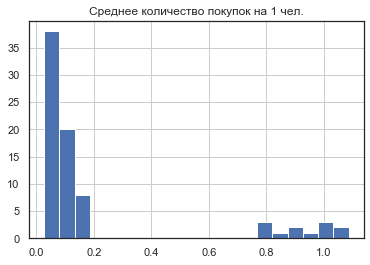

In [69]:
count_orders['count_orders_for_one'].hist(bins=20).set_title('Среднее количество покупок на 1 чел.');

#### Средний чек

Рассчитаем средний чек на покупателя, отберем покупки за полгода

In [70]:
orders6 = orders[(orders['buy_ts']>='2017-07-01')&(orders['buy_ts']<='2017-12-31')]
orders6.head()   

,buy_ts,revenue,uid,first_start_date,first_start_month,order_month,count_users
2353,2017-07-01 00:02:00,8.55,15267325101663366816,2017-06-30 23:59:00,2017-06-01,2017-07-01,2919
2354,2017-07-01 05:59:00,18.33,6645567837166442471,2017-06-30 22:21:00,2017-06-01,2017-07-01,2919
2355,2017-07-01 09:45:00,2.44,11807351310853811107,2017-06-07 10:05:00,2017-06-01,2017-07-01,2919
2356,2017-07-01 10:08:00,2.32,1624090811280903139,2017-06-20 20:18:00,2017-06-01,2017-07-01,2919
2357,2017-07-01 10:29:00,4.89,3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-07-01,2919


Посчитаем средний чек по дням

In [71]:
orders6['order_day'] = orders6['buy_ts'].astype('datetime64[D]')
check_for_day = orders6.groupby('order_day').agg({'revenue':'sum','uid':'nunique'})
check_for_day.columns=['revenue_sum','user_count']
check_for_day['mean_check_for_user']=(check_for_day['revenue_sum']/check_for_day['user_count']).round(2)
check_for_day.head()

,revenue_sum,user_count,mean_check_for_user
order_day,,,
2017-07-01,268.79,52,5.17
2017-07-02,200.98,41,4.90
2017-07-03,493.37,78,6.33
2017-07-04,335.23,67,5.00
2017-07-05,303.68,60,5.06


Text(0, 0.5, 'Средняя сумма чека (у.е.)')

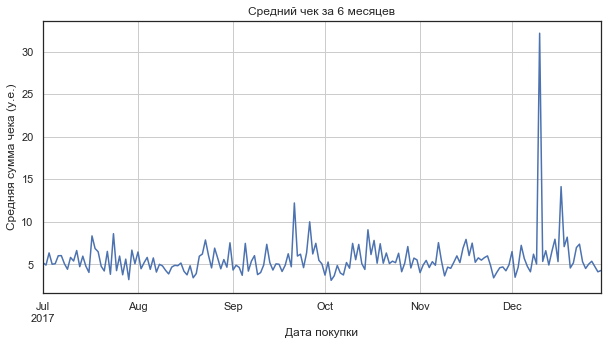

In [72]:
check_for_day.plot(y='mean_check_for_user',legend=False,figsize=(10,5),grid=True)
plt.title('Средний чек за 6 месяцев')
plt.xlabel('Дата покупки')
plt.ylabel('Средняя сумма чека (у.е.)')

На графике видно, что средний чек варьируется +/- 5 у.е., но в отдельные дни имеются всплески,превышающие 10 у.е.,видимо, в следствие каких-то акций.

In [73]:
'Средний чек за полгода =',check_for_day['mean_check_for_user'].mean().round(2)


('Средний чек за полгода =', 5.62)

<a class="anchor" id="32-bullet">

####  LTV

Сгруппируем покупки по когорте и месяцм

In [74]:
orders['cohort_order_lifetime'] = (orders['order_month'] - orders['first_start_month'])
orders['cohort_order_lifetime'] = orders['cohort_order_lifetime'] / np.timedelta64(1, 'M')
orders['cohort_order_lifetime'] = orders['cohort_order_lifetime'].round().astype('int') 

In [75]:
orders

,buy_ts,revenue,uid,first_start_date,first_start_month,order_month,count_users,cohort_order_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01,2919,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,2017-06-01,2919,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,2017-06-01,2919,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,2017-06-01,2919,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,2017-06-01,2919,0
...,...,...,...,...,...,...,...,...
49748,2018-05-30 23:34:00,0.37,3910948490794393283,2018-05-30 23:29:00,2018-05-01,2018-05-01,1889,0
49749,2018-05-30 23:38:00,1.10,15260920301052888366,2018-05-30 23:37:00,2018-05-01,2018-05-01,1889,0
49750,2018-05-30 23:40:00,0.37,5551662730948864339,2018-05-30 23:36:00,2018-05-01,2018-05-01,1889,0
49751,2018-05-30 23:46:00,3.36,2570770084478314062,2018-05-30 23:35:00,2018-05-01,2018-05-01,1889,0


In [76]:
orders6 = orders[orders['cohort_order_lifetime'] < 6]
orders6

,buy_ts,revenue,uid,first_start_date,first_start_month,order_month,count_users,cohort_order_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01,2919,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,2017-06-01,2919,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,2017-06-01,2919,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,2017-06-01,2919,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,2017-06-01,2919,0
...,...,...,...,...,...,...,...,...
49748,2018-05-30 23:34:00,0.37,3910948490794393283,2018-05-30 23:29:00,2018-05-01,2018-05-01,1889,0
49749,2018-05-30 23:38:00,1.10,15260920301052888366,2018-05-30 23:37:00,2018-05-01,2018-05-01,1889,0
49750,2018-05-30 23:40:00,0.37,5551662730948864339,2018-05-30 23:36:00,2018-05-01,2018-05-01,1889,0
49751,2018-05-30 23:46:00,3.36,2570770084478314062,2018-05-30 23:35:00,2018-05-01,2018-05-01,1889,0


In [77]:
revenue_new=orders6.groupby(['first_start_month', 'order_month']).agg({'revenue': 'sum','cohort_order_lifetime':'max','count_users':'max'}).reset_index()
revenue_new.columns=['first_start_month','order_month','revenue_sum','cohort_order_lifetime','count_users']
revenue_new.head()

,first_start_month,order_month,revenue_sum,cohort_order_lifetime,count_users
0,2017-06-01,2017-06-01,9557.49,0,2919
1,2017-06-01,2017-07-01,2664.58,1,2919
2,2017-06-01,2017-08-01,1464.69,2,2919
3,2017-06-01,2017-09-01,3882.09,3,2919
4,2017-06-01,2017-10-01,3940.59,4,2919


Добавим маржинальность и посчитаем LTV

In [78]:
margin_rate = 1
revenue_new['gp'] = revenue_new['revenue_sum'] * margin_rate
revenue_new['ltv'] = revenue_new['gp'] / revenue_new['count_users']
revenue_new.head()

,first_start_month,order_month,revenue_sum,cohort_order_lifetime,count_users,gp,ltv
0,2017-06-01,2017-06-01,9557.49,0,2919,9557.49,3.274234
1,2017-06-01,2017-07-01,2664.58,1,2919,2664.58,0.912840
2,2017-06-01,2017-08-01,1464.69,2,2919,1464.69,0.501778
3,2017-06-01,2017-09-01,3882.09,3,2919,3882.09,1.329938
4,2017-06-01,2017-10-01,3940.59,4,2919,3940.59,1.349979


Сгруппируем по времени жизни когорты

In [79]:
revenue_new['first_start_month'] = revenue_new['first_start_month'].dt.strftime('%Y-%m')
report6_ltv = revenue_new.pivot_table(index='first_start_month', columns='cohort_order_lifetime', values='ltv', aggfunc='mean')
report6_ltv.fillna(0,inplace=True) 
report6_ltv= report6_ltv.cumsum(axis=1)

In [80]:
report6_ltv = report6_ltv[1:7]

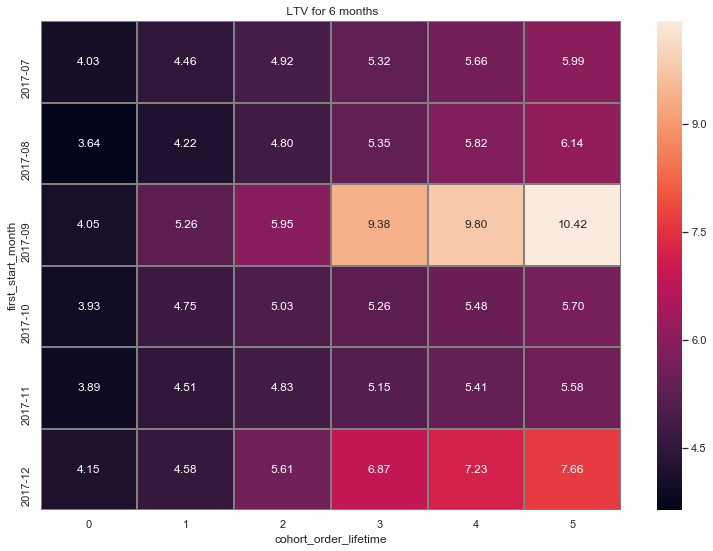

In [81]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title(' LTV for 6 months')
sns.heatmap(report6_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 


In [82]:

mean_ltv6 = report6_ltv.mean(axis=0).round(2)
'Средний LTV за 6 мес.',mean_ltv6

('Средний LTV за 6 мес.', cohort_order_lifetime
 0    3.95
 1    4.63
 2    5.19
 3    6.22
 4    6.57
 5    6.91
 dtype: float64)

**Заключение по разделу** В этом разделе рассчитаны метрики  электронной коммерции. Рассчитаны период до первой покупки, среднее  количество покупок на покупателя за 6 мес., а также средний чек  и LTV за 6 месяцев.

###  Маркетинговые метрики

#### Расходы по источникам

In [83]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [84]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')
costs.head(10)

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
5,1,2017-06-06,40.39,2017-06-01
6,1,2017-06-07,40.59,2017-06-01
7,1,2017-06-08,56.63,2017-06-01
8,1,2017-06-09,40.16,2017-06-01
9,1,2017-06-10,43.24,2017-06-01


In [85]:
costs['cost_month'] = costs['cost_month'].dt.strftime('%Y-%m')
total_costs = costs.pivot_table(index='cost_month',columns =['source_id'],values='costs',aggfunc ='sum')
total_costs

source_id,1,2,3,4,5,9,10
cost_month,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


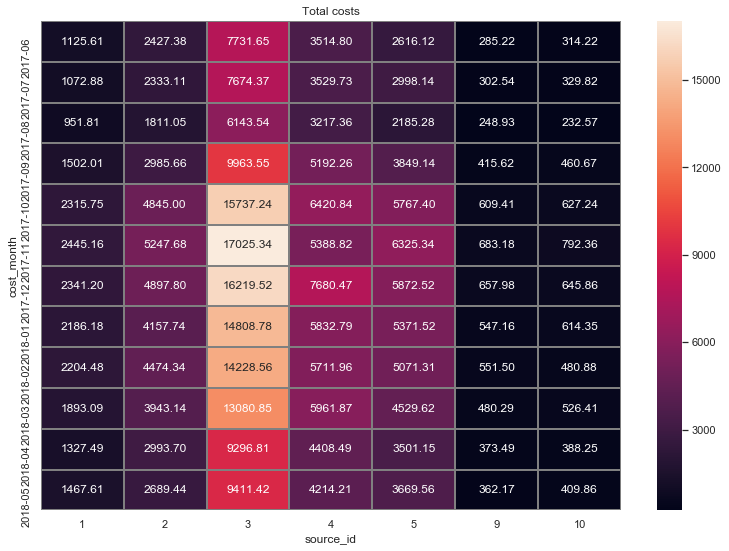

In [86]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Total costs')
sns.heatmap(total_costs, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 


#### CAC

Из visits отберем uid только покупателей

In [87]:

buyers=orders['uid'].unique()
visits['flag']=0
visits.loc[visits['uid'].isin(buyers), 'flag'] = 1
visits_active = visits[visits['flag']==1]
visits_active.head(5)

,device,end_ts,source_id,start_ts,uid,len_ts,session_year,session_month,session_week,session_date,first_start_date,first_start_month,start_month,cohort_lifetime,flag
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440,2018,5,20,2018-05-20,2018-03-09 20:05:00,2018-03-01,2018-05-01,2,1
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,60,2017,9,35,2017-09-03,2017-09-03 21:35:00,2017-09-01,2017-09-01,0,1
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,300,2018,2,6,2018-02-06,2017-06-04 14:17:00,2017-06-01,2018-02-01,8,1
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,3960,2018,2,7,2018-02-12,2018-02-10 12:17:00,2018-02-01,2018-02-01,0,1
25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,420,2017,12,49,2017-12-05,2017-09-23 23:27:00,2017-09-01,2017-12-01,3,1


In [88]:
visits_active['device'].unique()


array(['desktop', 'touch'], dtype=object)

Как выяснится позже, по коду 7 есть доход, но нет затрат. Чтобы не "попасть на деление на 0", заменим код на 1, т.к. жалко просто так выкинуть чистый доход 1.22. 

In [89]:
visits_active.loc[visits_active['source_id']==7,'source_id']=1

Выясним, каким первым устройством подключались

In [90]:
devices = visits_active.sort_values(by='start_ts').groupby('uid').agg({'source_id':'first'})
devices

,source_id
uid,
313578113262317,2
1575281904278712,10
2429014661409475,3
2464366381792757,5
2551852515556206,5
...,...
18445147675727495770,5
18445407535914413204,3
18445601152732270159,2


Добавим устройства в orders

In [91]:
orders=orders.merge(devices,on='uid')
orders

,buy_ts,revenue,uid,first_start_date,first_start_month,order_month,count_users,cohort_order_lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01,2919,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,2017-06-01,2919,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,2017-06-01,2919,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,2017-06-01,2919,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,2017-06-01,2919,0,3
...,...,...,...,...,...,...,...,...,...
49748,2018-05-30 23:34:00,0.37,3910948490794393283,2018-05-30 23:29:00,2018-05-01,2018-05-01,1889,0,3
49749,2018-05-30 23:38:00,1.10,15260920301052888366,2018-05-30 23:37:00,2018-05-01,2018-05-01,1889,0,4
49750,2018-05-30 23:40:00,0.37,5551662730948864339,2018-05-30 23:36:00,2018-05-01,2018-05-01,1889,0,2
49751,2018-05-30 23:46:00,3.36,2570770084478314062,2018-05-30 23:35:00,2018-05-01,2018-05-01,1889,0,1


Посчитаем количество людей с учетом источников


In [92]:
count_user_device = orders.groupby(['first_start_month','source_id']).agg({'uid': 'nunique'}).reset_index()
count_user_device.columns=['first_start_month','source_id','count_user_device']
count_user_device

,first_start_month,source_id,count_user_device
0,2017-06-01,1,239
1,2017-06-01,2,373
2,2017-06-01,3,885
3,2017-06-01,4,647
4,2017-06-01,5,508
...,...,...,...
79,2018-05-01,3,533
80,2018-05-01,4,547
81,2018-05-01,5,378
82,2018-05-01,9,28


Посчитаем расходы  по месяцам с учетом источника

In [93]:
costs_month_device = costs.groupby(['cost_month','source_id']).agg({'costs':'sum'}).reset_index()
costs_month_device.columns=['cost_month','source_id','costs_month_device']
costs_month_device

,cost_month,source_id,costs_month_device
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12
...,...,...,...
79,2018-05,3,9411.42
80,2018-05,4,4214.21
81,2018-05,5,3669.56
82,2018-05,9,362.17


Добавим количество людей в месяц

In [94]:
count_user_device['first_start_month'] = count_user_device['first_start_month'].dt.strftime('%Y-%m')
result_costs = pd.merge(costs_month_device,count_user_device,left_on=['cost_month','source_id'],right_on=['first_start_month','source_id'])
result_costs


,cost_month,source_id,costs_month_device,first_start_month,count_user_device
0,2017-06,1,1125.61,2017-06,239
1,2017-06,2,2427.38,2017-06,373
2,2017-06,3,7731.65,2017-06,885
3,2017-06,4,3514.80,2017-06,647
4,2017-06,5,2616.12,2017-06,508
...,...,...,...,...,...
79,2018-05,3,9411.42,2018-05,533
80,2018-05,4,4214.21,2018-05,547
81,2018-05,5,3669.56,2018-05,378
82,2018-05,9,362.17,2018-05,28


Посчитаем САС

In [95]:
result_costs['cac'] = (result_costs['costs_month_device'] / result_costs['count_user_device']).round(2)
result_costs.head(10)                        

,cost_month,source_id,costs_month_device,first_start_month,count_user_device,cac
0,2017-06,1,1125.61,2017-06,239,4.71
1,2017-06,2,2427.38,2017-06,373,6.51
2,2017-06,3,7731.65,2017-06,885,8.74
3,2017-06,4,3514.80,2017-06,647,5.43
4,2017-06,5,2616.12,2017-06,508,5.15
5,2017-06,9,285.22,2017-06,154,1.85
6,2017-06,10,314.22,2017-06,113,2.78
7,2017-07,1,1072.88,2017-07,184,5.83
8,2017-07,2,2333.11,2017-07,277,8.42
9,2017-07,3,7674.37,2017-07,663,11.58


Посмотрим расходы по месяцам по источникам

In [96]:
result_cac = result_costs.pivot_table(index='source_id',columns=['cost_month'],values='cac').round(2)
result_cac

cost_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,4.71,5.83,7.61,6.06,6.62,7.43,7.18,9.85,8.68,7.51,8.40,8.63
2,6.51,8.42,12.49,11.27,11.54,12.80,14.71,16.97,17.14,15.11,17.61,16.20
3,8.74,11.58,13.81,10.59,12.47,13.44,13.40,15.91,15.02,17.05,18.59,17.66
4,5.43,5.26,7.73,7.45,5.04,4.21,5.96,5.98,6.04,6.77,7.51,7.70
5,5.15,6.06,5.01,5.61,5.65,9.36,7.96,9.21,8.40,10.94,9.86,9.71
9,1.85,3.06,2.42,3.52,5.04,4.44,7.15,9.95,10.81,5.11,26.68,12.93
10,2.78,5.41,5.17,4.80,2.85,5.78,8.85,5.96,4.26,3.17,3.96,6.12


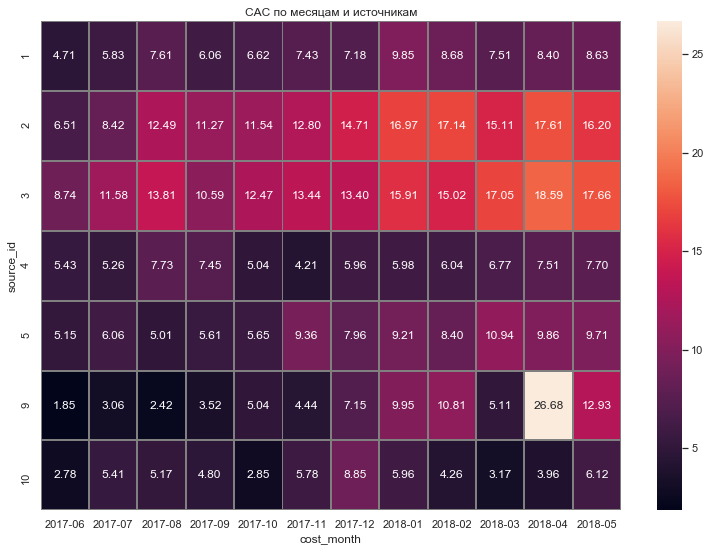

In [97]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('CAC по месяцам и источникам')
sns.heatmap(result_cac, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 


<a class="anchor" id="31-bullet">

Средние расходы по устройству: 

In [98]:
mean_cac_device =result_cac.mean(axis=1).round(2)
mean_cac_device

source_id
1      7.38
2     13.40
3     14.02
4      6.26
5      7.74
9      7.75
10     4.93
dtype: float64

#### ROMI по когортам в разрезе источников

Сначала посчитаем LTV  по источникам

In [99]:
cohorts_device =orders.groupby(['first_start_month','order_month','source_id']).agg({'revenue':'sum','cohort_order_lifetime':'max'}).reset_index()
cohorts_device.columns=['first_start_month','order_month','source_id','sum_month_device','cohort_order_lifetime']
cohorts_device.head(10)

,first_start_month,order_month,source_id,sum_month_device,cohort_order_lifetime
0,2017-06-01,2017-06-01,1,1378.70,0
1,2017-06-01,2017-06-01,2,1043.68,0
2,2017-06-01,2017-06-01,3,2804.34,0
3,2017-06-01,2017-06-01,4,1959.84,0
4,2017-06-01,2017-06-01,5,1898.89,0
5,2017-06-01,2017-06-01,9,242.69,0
6,2017-06-01,2017-06-01,10,229.35,0
7,2017-06-01,2017-07-01,1,662.73,1
8,2017-06-01,2017-07-01,2,395.74,1
9,2017-06-01,2017-07-01,3,720.14,1


добавим количество людей в когорту

In [100]:
cohorts_device['first_start_month'] = cohorts_device['first_start_month'].dt.strftime('%Y-%m')

In [101]:
report_device=pd.merge(cohorts_device,count_user_device,on=['first_start_month','source_id'])
report_device.head()

,first_start_month,order_month,source_id,sum_month_device,cohort_order_lifetime,count_user_device
0,2017-06,2017-06-01,1,1378.70,0,239
1,2017-06,2017-07-01,1,662.73,1,239
2,2017-06,2017-08-01,1,683.12,2,239
3,2017-06,2017-09-01,1,1613.45,3,239
4,2017-06,2017-10-01,1,1055.58,4,239


In [102]:
report_device['gp'] = report_device['sum_month_device'] * margin_rate

In [103]:
report_device['ltv'] = report_device['gp'] / report_device['count_user_device']
report_device

,first_start_month,order_month,source_id,sum_month_device,cohort_order_lifetime,count_user_device,gp,ltv
0,2017-06,2017-06-01,1,1378.70,0,239,1378.70,5.768619
1,2017-06,2017-07-01,1,662.73,1,239,662.73,2.772929
2,2017-06,2017-08-01,1,683.12,2,239,683.12,2.858243
3,2017-06,2017-09-01,1,1613.45,3,239,1613.45,6.750837
4,2017-06,2017-10-01,1,1055.58,4,239,1055.58,4.416653
...,...,...,...,...,...,...,...,...
533,2018-05,2018-05-01,3,1671.78,0,533,1671.78,3.136548
534,2018-05,2018-05-01,4,2254.78,0,547,2254.78,4.122084
535,2018-05,2018-05-01,5,1426.04,0,378,1426.04,3.772593
536,2018-05,2018-05-01,9,79.48,0,28,79.48,2.838571


Соберем все в таблицу

In [104]:
report_ltv = report_device.pivot_table(index= ['source_id','first_start_month'],columns='cohort_order_lifetime',values='ltv',aggfunc='mean').round(2)
report_ltv.fillna('',inplace=True)
report_ltv.head(48)

cohort_order_lifetime          0     1     2      3     4     5     6     7   \
source_id first_start_month                                                    
1         2017-06            5.77  2.77  2.86   6.75  4.42  2.51  2.83  4.14   
          2017-07            4.99  0.71  1.14   0.63  0.52  0.45   0.3  0.84   
          2017-08            5.03  0.97  0.97    0.8  0.55  0.49  0.02  7.13   
          2017-09            4.54  1.77  0.94   1.12  0.64   0.5  0.11  0.06   
          2017-10            5.40  1.53   0.5    0.5  0.38  0.23  0.31  0.42   
          2017-11            5.95  0.28  0.29   0.13  0.46  0.09  0.14         
          2017-12            4.21  0.44   0.4   0.91  0.04  0.39               
          2018-01            3.94  0.37  0.19   0.08  0.08                     
          2018-02            4.26  1.17  0.07   0.33                           
          2018-03            5.87  0.24  0.34                                  
          2018-04            4.85  0.31                                        
          2018-05            4.37                                              
2         2017-06            2.80  1.06  0.26   2.67  2.98  1.12  1.99  1.61   
          2017-07            5.32  1.06  0.38   0.62  0.84  0.96  0.43  0.28   
          2017-08            3.71  0.59  0.21   0.59  0.33  0.34   0.4  0.24   
          2017-09            4.63  5.85  2.42   0.57  0.77  0.67  0.48  0.04   
          2017-10            5.83  3.55  0.46   0.47  0.31  0.41  0.11  0.14   
          2017-11            4.25  1.27  1.09   1.41   0.7  0.54   0.3         
          2017-12            8.24  1.35  10.3  12.44  3.28   3.5               
          2018-01            3.70  1.54  2.24   0.32  0.33                     
          2018-02            4.47  1.53  0.47   0.35                           
          2018-03            4.79  1.08  1.56                                  
          2018-04            5.24  1.22                                        
          2018-05            3.96                                              
3         2017-06            3.17  0.81  0.24   0.43  0.51  0.42  0.23  0.14   
          2017-07            3.74  0.27   0.3   0.49  0.14   0.2  0.21  0.31   
          2017-08            3.52  0.39  0.47   0.36   0.3  0.16  0.16  0.16   
          2017-09            4.15  0.77  0.58   0.18  0.29  0.17  0.37  0.08   
          2017-10            3.50  0.63  0.24   0.14  0.24  0.23   0.1  0.06   
          2017-11            3.57  0.49  0.23   0.24  0.24  0.11  0.12         
          2017-12            3.70  0.42  0.19   0.17  0.14  0.18               
          2018-01            3.37  0.41  0.24    0.1  0.27                     
          2018-02            3.36  0.53  0.14    0.1                           
          2018-03            3.76  0.31  0.14                                  
          2018-04            4.31  1.79                                        
          2018-05            3.14                                              
4         2017-06            3.03   0.5  0.22   0.65  1.14  1.81     2  0.37   
          2017-07            3.81   0.3  0.23   0.29  0.26  0.21  0.21  0.27   
          2017-08            3.53  0.41  0.26    0.5  0.17  0.19  0.33  0.17   
          2017-09            3.38  0.77  0.41   0.28  0.17  0.19  0.22  0.05   
          2017-10            3.47  0.35  0.29   0.21  0.16  0.18  0.14  0.13   
          2017-11            3.79  0.71  0.19   0.22  0.21  0.17  0.14         
          2017-12            3.53  0.27   0.2   0.18  0.11  0.13               
          2018-01            3.16  0.52  0.19   0.08  0.05                     
          2018-02            3.55  0.46  0.31   0.19                           
          2018-03            4.34  0.31  0.07                                  
          2018-04            4.26  0.51                                        
          2018-05            4.12                                              


In [105]:
report_ltv.tail(36)

cohort_order_lifetime          0     1     2     3     4     5     6     7   \
source_id first_start_month                                                   
5         2017-06            3.74     1   0.5  0.76  0.69  0.36  0.95  0.54   
          2017-07            4.19  0.38  0.66  0.19  0.29  0.31  0.15  0.25   
          2017-08            3.86  0.93  0.91  0.76  1.02  0.58  0.37   0.3   
          2017-09            4.85  0.38  0.43  13.9  0.71  1.83  0.36  0.39   
          2017-10            4.34  0.41  0.22   0.2   0.2  0.19  0.08  0.13   
          2017-11            3.86  0.54  0.26   0.1  0.05   0.1  0.15         
          2017-12            4.35  0.32  0.17  0.25  0.04  0.04               
          2018-01            3.87  0.87  0.16  0.07  0.11                     
          2018-02            3.87  0.48  0.13  0.06                           
          2018-03            4.43  0.23   0.1                                 
          2018-04            4.01  0.41                                       
          2018-05            3.77                                             
9         2017-06            1.58  0.21  0.48  0.52  1.22  0.56  0.57  0.29   
          2017-07            2.07   0.6  1.09  0.78  0.57  0.11  0.39  0.17   
          2017-08            1.59   0.3  1.12  0.59  0.42   0.2  0.56  0.43   
          2017-09            2.04  1.17  0.91  0.77   0.4  0.48  0.41   0.8   
          2017-10            2.39  0.73  0.34  0.25  0.47  0.07  0.24     0   
          2017-11            2.14  0.66  0.38  0.47  0.29  0.19   0.1         
          2017-12            2.99  0.55  0.13  0.55  0.18  0.08               
          2018-01            1.70  1.02  0.54  0.01  0.08                     
          2018-02            3.11  0.67  0.29   0.8                           
          2018-03            2.35  0.15  0.12                                 
          2018-04            5.13  1.83                                       
          2018-05            2.84                                             
10        2017-06            2.03  0.19        0.04  0.33        0.03         
          2017-07            2.72  0.03   0.1  0.07  0.92  0.22  0.25  0.22   
          2017-08            4.11  0.27  0.43  0.02  0.04        0.04   0.1   
          2017-09            1.81  0.53  0.04  0.21  0.02  0.05   0.1  0.01   
          2017-10            2.09  0.18  0.09  0.02  0.09  0.22  0.08  0.03   
          2017-11            3.76  0.41  0.16  0.13   0.1  0.02  0.18         
          2017-12            3.17  0.15  0.17  0.17        0.02               
          2018-01            2.43  0.37  0.34  0.05   0.4                     
          2018-02            2.01  0.24     0  0.06                           
          2018-03            3.10  0.14  0.05                                 
          2018-04            2.42  0.22                                       
          2018-05            1.81                                             

cohort_order_lifetime          8     9     10    11  
source_id first_start_month                          
5         2017-06            0.54  1.23  0.17  0.15  
          2017-07             0.2  0.11  0.08        
          2017-08             0.3  0.22              
          2017-09            0.05                    
          2017-10                                    
          2017-11                                    
          2017-12                                    
          2018-01                                    
          2018-02                                    
          2018-03                                    
          2018-04                                    
          2018-05                                    
9         2017-06             0.6  0.89  0.17   0.1  
          2017-07            0.62  0.12   0.3        
          2017-08            0.11  0.15              
          2017-09            0.81                    
          2017-10        

добавим в report САС

In [106]:
cac = result_costs[['cost_month','source_id','cac']]
cac.head()

,cost_month,source_id,cac
0,2017-06,1,4.71
1,2017-06,2,6.51
2,2017-06,3,8.74
3,2017-06,4,5.43
4,2017-06,5,5.15


In [107]:
total_report = pd.merge(report_device,cac,left_on=['first_start_month','source_id'],right_on=['cost_month','source_id'],how='outer')
total_report

,first_start_month,order_month,source_id,sum_month_device,cohort_order_lifetime,count_user_device,gp,ltv,cost_month,cac
0,2017-06,2017-06-01,1,1378.70,0,239,1378.70,5.768619,2017-06,4.71
1,2017-06,2017-07-01,1,662.73,1,239,662.73,2.772929,2017-06,4.71
2,2017-06,2017-08-01,1,683.12,2,239,683.12,2.858243,2017-06,4.71
3,2017-06,2017-09-01,1,1613.45,3,239,1613.45,6.750837,2017-06,4.71
4,2017-06,2017-10-01,1,1055.58,4,239,1055.58,4.416653,2017-06,4.71
...,...,...,...,...,...,...,...,...,...,...
533,2018-05,2018-05-01,3,1671.78,0,533,1671.78,3.136548,2018-05,17.66
534,2018-05,2018-05-01,4,2254.78,0,547,2254.78,4.122084,2018-05,7.70
535,2018-05,2018-05-01,5,1426.04,0,378,1426.04,3.772593,2018-05,9.71
536,2018-05,2018-05-01,9,79.48,0,28,79.48,2.838571,2018-05,12.93


In [108]:
total_report['romi'] = (total_report['ltv'] / total_report['cac']).round(2)
total_report

,first_start_month,order_month,source_id,sum_month_device,cohort_order_lifetime,count_user_device,gp,ltv,cost_month,cac,romi
0,2017-06,2017-06-01,1,1378.70,0,239,1378.70,5.768619,2017-06,4.71,1.22
1,2017-06,2017-07-01,1,662.73,1,239,662.73,2.772929,2017-06,4.71,0.59
2,2017-06,2017-08-01,1,683.12,2,239,683.12,2.858243,2017-06,4.71,0.61
3,2017-06,2017-09-01,1,1613.45,3,239,1613.45,6.750837,2017-06,4.71,1.43
4,2017-06,2017-10-01,1,1055.58,4,239,1055.58,4.416653,2017-06,4.71,0.94
...,...,...,...,...,...,...,...,...,...,...,...
533,2018-05,2018-05-01,3,1671.78,0,533,1671.78,3.136548,2018-05,17.66,0.18
534,2018-05,2018-05-01,4,2254.78,0,547,2254.78,4.122084,2018-05,7.70,0.54
535,2018-05,2018-05-01,5,1426.04,0,378,1426.04,3.772593,2018-05,9.71,0.39
536,2018-05,2018-05-01,9,79.48,0,28,79.48,2.838571,2018-05,12.93,0.22


In [109]:
report_romi=total_report.pivot_table(index=['source_id','first_start_month'],
                                     columns='cohort_order_lifetime',
                                     values='romi',aggfunc='mean').cumsum(axis=1)
report_romi.fillna('',inplace=True)
report_romi.head(48)

cohort_order_lifetime          0     1     2     3     4     5     6     7   \
source_id first_start_month                                                   
1         2017-06            1.22  1.81  2.42  3.85  4.79  5.32  5.92   6.8   
          2017-07            0.86  0.98  1.18  1.29  1.38  1.46  1.51  1.65   
          2017-08            0.66  0.79  0.92  1.02  1.09  1.15  1.15  2.09   
          2017-09            0.75  1.04  1.19  1.38  1.49  1.57  1.59   1.6   
          2017-10            0.82  1.05  1.13  1.21  1.27   1.3  1.35  1.41   
          2017-11            0.80  0.84  0.88   0.9  0.96  0.97  0.99         
          2017-12            0.59  0.65  0.71  0.84  0.85   0.9               
          2018-01            0.40  0.44  0.46  0.47  0.48                     
          2018-02            0.49  0.63  0.64  0.68                           
          2018-03            0.78  0.81  0.85                                 
          2018-04            0.58  0.62                                       
          2018-05            0.51                                             
2         2017-06            0.43  0.59  0.63  1.04   1.5  1.67  1.98  2.23   
          2017-07            0.63  0.76  0.81  0.88  0.98  1.09  1.14  1.17   
          2017-08            0.30  0.35  0.37  0.42  0.45  0.48  0.51  0.53   
          2017-09            0.41  0.93  1.14  1.19  1.26  1.32  1.36  1.36   
          2017-10            0.51  0.82  0.86   0.9  0.93  0.97  0.98  0.99   
          2017-11            0.33  0.43  0.52  0.63  0.68  0.72  0.74         
          2017-12            0.56  0.65  1.35   2.2  2.42  2.66               
          2018-01            0.22  0.31  0.44  0.46  0.48                     
          2018-02            0.26  0.35  0.38   0.4                           
          2018-03            0.32  0.39  0.49                                 
          2018-04            0.30  0.37                                       
          2018-05            0.24                                             
3         2017-06            0.36  0.45  0.48  0.53  0.59  0.64  0.67  0.69   
          2017-07            0.32  0.34  0.37  0.41  0.42  0.44  0.46  0.49   
          2017-08            0.26  0.29  0.32  0.35  0.37  0.38  0.39   0.4   
          2017-09            0.39  0.46  0.51  0.53  0.56  0.58  0.62  0.63   
          2017-10            0.28  0.33  0.35  0.36  0.38   0.4  0.41  0.41   
          2017-11            0.27  0.31  0.33  0.35  0.37  0.38  0.39         
          2017-12            0.28  0.31  0.32  0.33  0.34  0.35               
          2018-01            0.21  0.24  0.26  0.27  0.29                     
          2018-02            0.22  0.26  0.27  0.28                           
          2018-03            0.22  0.24  0.25                                 
          2018-04            0.23  0.33                                       
          2018-05            0.18                                             
4         2017-06            0.56  0.65  0.69  0.81  1.02  1.35  1.72  1.79   
          2017-07            0.72  0.78  0.82  0.88  0.93  0.97  1.01  1.06   
          2017-08            0.46  0.51  0.54   0.6  0.62  0.64  0.68   0.7   
          2017-09            0.45  0.55  0.61  0.65  0.67   0.7  0.73  0.74   
          2017-10            0.69  0.76  0.82  0.86  0.89  0.93  0.96  0.98   
          2017-11            0.90  1.07  1.12  1.17  1.22  1.26  1.29         
          2017-12            0.59  0.63  0.66  0.69  0.71  0.73               
          2018-01            0.53  0.62  0.65  0.66  0.67                     
          2018-02            0.59  0.67  0.72  0.75                           
          2018-03            0.64  0.69   0.7                                 
          2018-04            0.57  0.64                                       
          2018-05            0.54                                             

cohort_order_lifetime          8     9     10    

In [110]:
report_romi=total_report.pivot_table(index=['source_id','first_start_month'],
                                     columns='cohort_order_lifetime',
                                     values='romi',
                                     aggfunc='mean').cumsum(axis=1)
report_romi.fillna('',inplace=True)
report_romi.tail(36)

cohort_order_lifetime          0     1     2     3     4     5     6     7   \
source_id first_start_month                                                   
5         2017-06            0.73  0.92  1.02  1.17   1.3  1.37  1.55  1.65   
          2017-07            0.69  0.75  0.86  0.89  0.94  0.99  1.02  1.06   
          2017-08            0.77  0.96  1.14  1.29  1.49  1.61  1.68  1.74   
          2017-09            0.87  0.94  1.02   3.5  3.63  3.96  4.02  4.09   
          2017-10            0.77  0.84  0.88  0.92  0.96  0.99     1  1.02   
          2017-11            0.41  0.47   0.5  0.51  0.52  0.53  0.55         
          2017-12            0.55  0.59  0.61  0.64  0.64  0.65               
          2018-01            0.42  0.51  0.53  0.54  0.55                     
          2018-02            0.46  0.52  0.54  0.55                           
          2018-03            0.40  0.42  0.43                                 
          2018-04            0.41  0.45                                       
          2018-05            0.39                                             
9         2017-06            0.85  0.96  1.22   1.5  2.16  2.46  2.77  2.92   
          2017-07            0.68  0.88  1.23  1.49  1.68  1.72  1.85   1.9   
          2017-08            0.66  0.79  1.25  1.49  1.66  1.74  1.97  2.15   
          2017-09            0.58  0.91  1.17  1.39   1.5  1.64  1.76  1.99   
          2017-10            0.47  0.61  0.68  0.73  0.82  0.83  0.88  0.88   
          2017-11            0.48  0.63  0.72  0.83  0.89  0.93  0.95         
          2017-12            0.42   0.5  0.52   0.6  0.63  0.64               
          2018-01            0.17  0.27  0.32  0.32  0.33                     
          2018-02            0.29  0.35  0.38  0.45                           
          2018-03            0.46  0.49  0.51                                 
          2018-04            0.19  0.26                                       
          2018-05            0.22                                             
10        2017-06            0.73   0.8        0.81  0.93        0.94         
          2017-07            0.50   0.5  0.52  0.53   0.7  0.74  0.79  0.83   
          2017-08            0.79  0.84  0.92  0.92  0.93        0.94  0.96   
          2017-09            0.38  0.49   0.5  0.54  0.54  0.55  0.57  0.57   
          2017-10            0.73  0.79  0.82  0.83  0.86  0.94  0.97  0.98   
          2017-11            0.65  0.72  0.75  0.77  0.79  0.79  0.82         
          2017-12            0.36  0.38   0.4  0.42        0.42               
          2018-01            0.41  0.47  0.53  0.54  0.61                     
          2018-02            0.47  0.53  0.53  0.54                           
          2018-03            0.98  1.02  1.03                                 
          2018-04            0.61  0.66                                       
          2018-05            0.30                                             

cohort_order_lifetime          8     9     10    11  
source_id first_start_month                          
5         2017-06            1.75  1.99  2.02  2.05  
          2017-07            1.09  1.11  1.12        
          2017-08             1.8  1.84              
          2017-09             4.1                    
          2017-10                                    
          2017-11                                    
          2017-12                                    
          2018-01                                    
          2018-02                                    
          2018-03                                    
          2018-04                                    
          2018-05                                    
9         2017-06            3.24  3.72  3.81  3.86  
          2017-07             2.1  2.14  2.24        
          2017-08             2.2  2.26              
          2017-09            2.22                    
          2017-10        

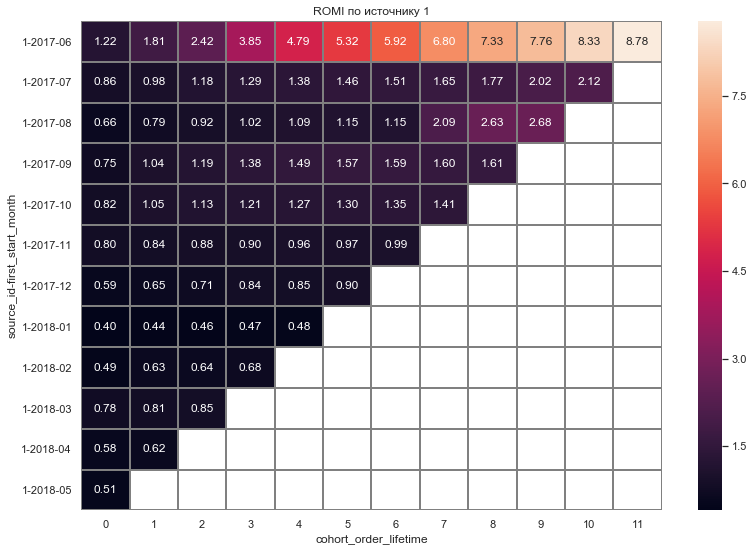

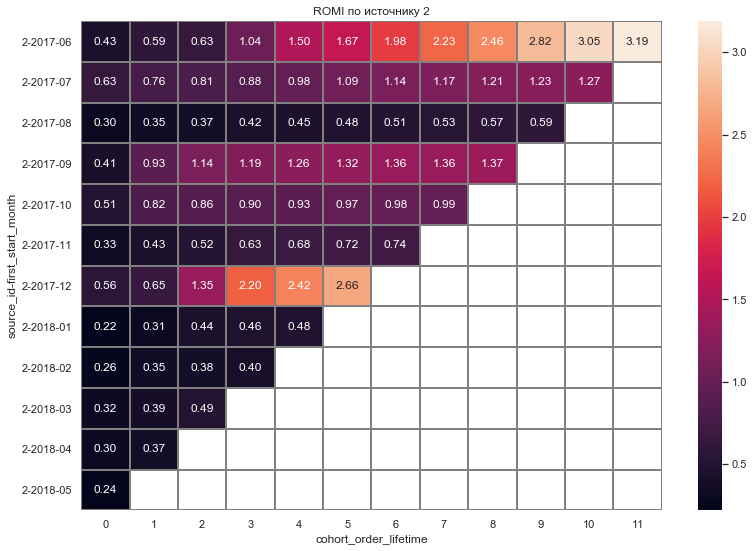

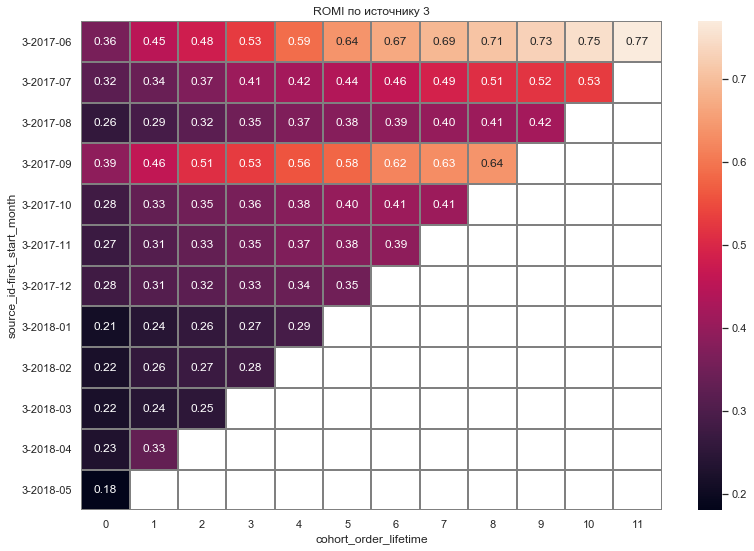

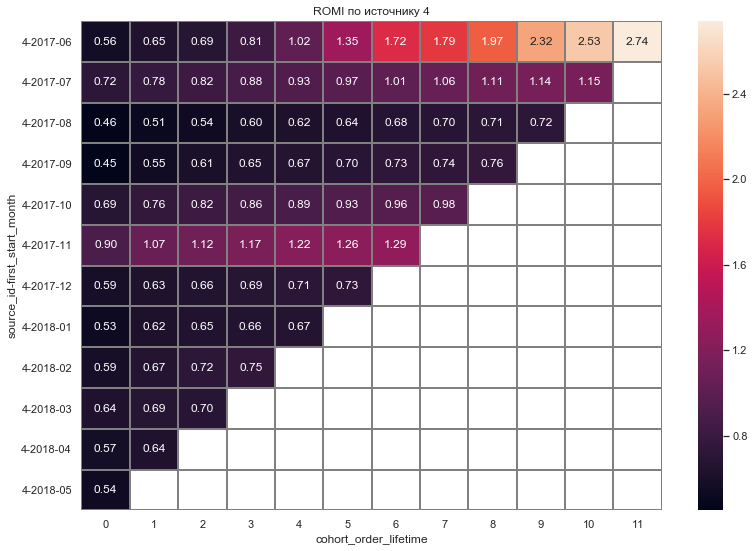

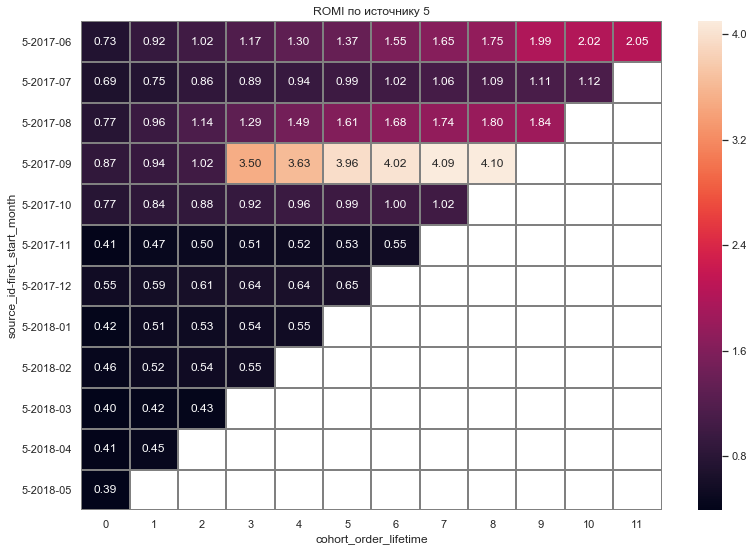

In [111]:
for i in range(1,6):
    r=[[]]
    r=total_report[total_report['source_id']==i]
    rep=r.pivot_table(index=['source_id','first_start_month'],columns='cohort_order_lifetime',values='romi',aggfunc='mean') 
    #rep.fillna(0,inplace=True)
    rep=rep.cumsum(axis=1).round(2)
    s='ROMI по источнику '+str(i)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title(s)
    sns.heatmap(rep, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 
    mean_rep=rep.mean(axis=0).round(2)
    mean_rep

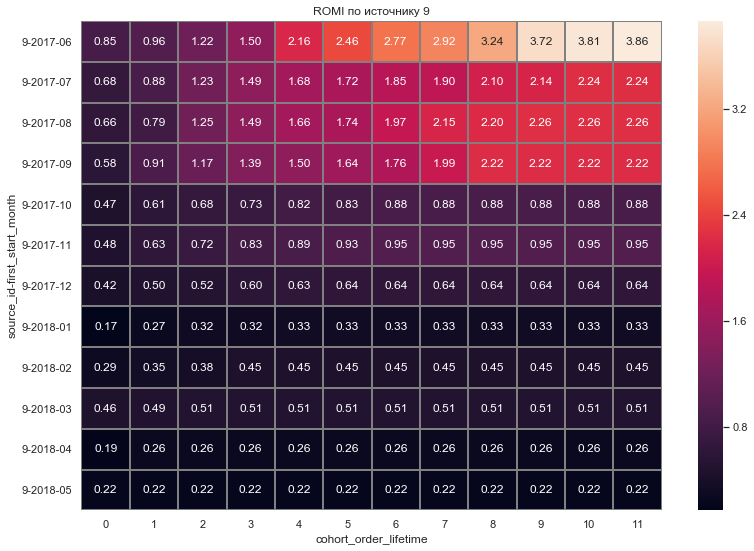

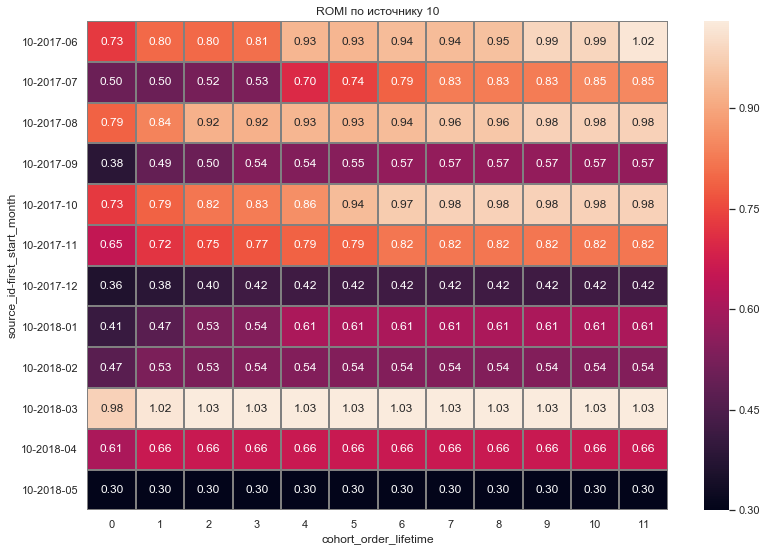

In [112]:
for i in range(9,11):
    r=[[]]
    r=total_report[total_report['source_id']==i]
    rep=r.pivot_table(index=['source_id','first_start_month'],columns='cohort_order_lifetime',values='romi',aggfunc='mean') 
    rep.fillna(0,inplace=True)
    rep=rep.cumsum(axis=1).round(2)                  
    s='ROMI по источнику '+str(i)
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title(s)
    sns.heatmap(rep, annot=True, fmt='.2f', linewidths=1, linecolor='gray')         

In [113]:
for i in range(1,6):
    r=[[]]
    r=total_report[total_report['source_id']==i]
    rep=r.pivot_table(index=['source_id','first_start_month'],columns='cohort_order_lifetime',values='romi',aggfunc='mean') 
    rep.fillna(0,inplace=True)
    rep=rep.cumsum(axis=1).round(2) 
    s='ROMI по источнику '+str(i)
    mean_rep=rep.mean(axis=0).round(2)
    
    print(s,mean_rep)

ROMI по источнику 1 cohort_order_lifetime
0     0.70
1     0.85
2     0.96
3     1.14
4     1.25
5     1.32
6     1.38
7     1.55
8     1.65
9     1.71
10    1.76
11    1.80
dtype: float64
ROMI по источнику 2 cohort_order_lifetime
0     0.38
1     0.52
2     0.63
3     0.77
4     0.85
5     0.91
6     0.95
7     0.97
8     1.00
9     1.03
10    1.05
11    1.07
dtype: float64
ROMI по источнику 3 cohort_order_lifetime
0     0.27
1     0.31
2     0.33
3     0.35
4     0.36
5     0.38
6     0.38
7     0.39
8     0.40
9     0.40
10    0.40
11    0.40
dtype: float64
ROMI по источнику 4 cohort_order_lifetime
0     0.60
1     0.68
2     0.71
3     0.75
4     0.78
5     0.82
6     0.87
7     0.88
8     0.90
9     0.94
10    0.95
11    0.97
dtype: float64
ROMI по источнику 5 cohort_order_lifetime
0     0.57
1     0.65
2     0.70
3     0.94
4     0.99
5     1.04
6     1.07
7     1.09
8     1.11
9     1.14
10    1.14
11    1.14
dtype: float64


In [114]:
for i in range(9,11):
    r=[[]]
    r=total_report[total_report['source_id']==i]
    rep=r.pivot_table(index=['source_id','first_start_month'],columns='cohort_order_lifetime',values='romi',aggfunc='mean') 
    rep.fillna(0,inplace=True)
    rep=rep.cumsum(axis=1).round(2) 
    s='ROMI по источнику '+str(i)
    mean_rep=rep.mean(axis=0).round(2)
    
    print(s,mean_rep)

ROMI по источнику 9 cohort_order_lifetime
0     0.46
1     0.57
2     0.71
3     0.82
4     0.93
5     0.98
6     1.05
7     1.10
8     1.17
9     1.22
10    1.23
11    1.24
dtype: float64
ROMI по источнику 10 cohort_order_lifetime
0     0.58
1     0.62
2     0.65
3     0.66
4     0.69
5     0.70
6     0.72
7     0.72
8     0.72
9     0.73
10    0.73
11    0.73
dtype: float64


Посмотрим, как распределились источники по %% использования в общих просмотрах всех пользователей, и отдельно, которых потом сделали покупку

In [115]:
(visits['source_id'].value_counts()/visits['source_id'].count()*100).round(2)


4     28.32
3     23.82
5     18.62
2     13.25
1      9.49
9      3.69
10     2.79
7      0.01
6      0.00
Name: source_id, dtype: float64

In [116]:
(visits_active['source_id'].value_counts()/visits_active['source_id'].count()*100).round(2)

4     22.71
2     19.43
3     18.50
1     16.52
5     15.28
9      4.96
10     2.60
Name: source_id, dtype: float64

Рейтинги не совпадают, нельзя сделать каких-либо  выводов, не зная, что стоит за этими кодами. 

**Заключение по разделу:** в этом разделе были рассчитаны маркетинговые метрики, получены таблицы и графики. Основные выводы по ним  - в разделе 2.5 "Общий вывод"

### Без учета источников

Здесь помотрим общую совокупную картину

In [117]:
first_start = visits2.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_start.columns = ['uid', 'first_start_date']
first_start['first_start_month2'] = first_start['first_start_date'].astype('datetime64[M]')
first_start


,uid,first_start_date,first_start_month2
0,11863502262781,2018-03-01 17:27:00,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-01
...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-01


In [118]:
orders.head(1)

,buy_ts,revenue,uid,first_start_date,first_start_month,order_month,count_users,cohort_order_lifetime,source_id
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01,2919,0,1


In [119]:
cohort_sizes = (orders.groupby('first_start_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes.columns = ['first_start_month', 'n_buyers']
cohort_sizes.head()

,first_start_month,n_buyers
0,2017-06-01,2919
1,2017-07-01,2450
2,2017-08-01,1715
3,2017-09-01,3051
4,2017-10-01,4669


In [120]:
cohorts = (
    orders.groupby(['first_start_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts.head(1)


,first_start_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49


In [121]:
report = pd.merge(cohort_sizes, cohorts, on='first_start_month')
report.columns=['first_start_month','n_buyers','order_month','revenue']
report.head(1)

,first_start_month,n_buyers,order_month,revenue
0,2017-06-01,2919,2017-06-01,9557.49


In [122]:
report['gp'] = report['revenue'] * margin_rate

In [123]:
report['age'] = (
    report['order_month'] - report['first_start_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [124]:
report['ltv'] = report['gp'] / report['n_buyers']

In [125]:
report.head(1)

,first_start_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2919,2017-06-01,9557.49,9557.49,0,3.274234


In [126]:
report['first_start_month'] = report['first_start_month'].dt.strftime('%Y-%m')
result = report.pivot_table(
    index='first_start_month', columns='age', values='ltv', aggfunc='mean'
).round(2)
result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_start_month,,,,,,,,,,,,
2017-06,3.27,0.91,0.50,1.33,1.35,0.97,1.20,0.78,0.79,1.19,0.76,0.62
2017-07,4.03,0.43,0.45,0.40,0.35,0.33,0.24,0.31,0.30,0.24,0.15,NaN
2017-08,3.64,0.58,0.58,0.55,0.47,0.31,0.28,0.73,0.48,0.16,NaN,NaN
2017-09,4.05,1.21,0.69,3.42,0.42,0.63,0.32,0.16,0.12,NaN,NaN,NaN
2017-10,3.93,0.82,0.28,0.23,0.22,0.22,0.12,0.12,NaN,NaN,NaN,NaN
2017-11,3.89,0.63,0.32,0.32,0.26,0.17,0.15,NaN,NaN,NaN,NaN,NaN
2017-12,4.15,0.43,1.03,1.26,0.36,0.42,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,3.40,0.63,0.37,0.10,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,3.62,0.62,0.21,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
costs.head(1)

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.2,2017-06


In [128]:
monthly_costs = costs.groupby('cost_month').sum()

In [129]:
report_new = pd.merge(report, monthly_costs, left_on='first_start_month', right_on='cost_month')

In [130]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new

,first_start_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,romi
0,2017-06,2919,2017-06-01,9557.49,9557.49,0,3.274234,1020,18015.00,6.171634,0.530530
1,2017-06,2919,2017-07-01,2664.58,2664.58,1,0.912840,1020,18015.00,6.171634,0.147909
2,2017-06,2919,2017-08-01,1464.69,1464.69,2,0.501778,1020,18015.00,6.171634,0.081304
3,2017-06,2919,2017-09-01,3882.09,3882.09,3,1.329938,1020,18015.00,6.171634,0.215492
4,2017-06,2919,2017-10-01,3940.59,3940.59,4,1.349979,1020,18015.00,6.171634,0.218739
...,...,...,...,...,...,...,...,...,...,...,...
73,2018-03,2835,2018-04-01,984.00,984.00,1,0.347090,1025,30415.27,10.728490,0.032352
74,2018-03,2835,2018-05-01,726.38,726.38,2,0.256219,1025,30415.27,10.728490,0.023882
75,2018-04,1882,2018-04-01,8043.82,8043.82,0,4.274081,986,22289.38,11.843454,0.360881
76,2018-04,1882,2018-05-01,1642.50,1642.50,1,0.872742,986,22289.38,11.843454,0.073690


#### ROMI

In [131]:
output = report_new.pivot_table(
    index='first_start_month', columns='age', values='romi', aggfunc='mean'
).round(2)

In [132]:
output =output.cumsum(axis=1)
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_start_month,,,,,,,,,,,,
2017-06,0.53,0.68,0.76,0.98,1.20,1.36,1.55,1.68,1.81,2.00,2.12,2.22
2017-07,0.54,0.60,0.66,0.71,0.76,0.80,0.83,0.87,0.91,0.94,0.96,NaN
2017-08,0.42,0.49,0.56,0.62,0.67,0.71,0.74,0.82,0.88,0.90,NaN,NaN
2017-09,0.51,0.66,0.75,1.18,1.23,1.31,1.35,1.37,1.38,NaN,NaN,NaN
2017-10,0.51,0.61,0.65,0.68,0.71,0.74,0.76,0.78,NaN,NaN,NaN,NaN
2017-11,0.44,0.51,0.55,0.59,0.62,0.64,0.66,NaN,NaN,NaN,NaN,NaN
2017-12,0.44,0.49,0.60,0.73,0.77,0.82,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.32,0.38,0.41,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.35,0.41,0.43,0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


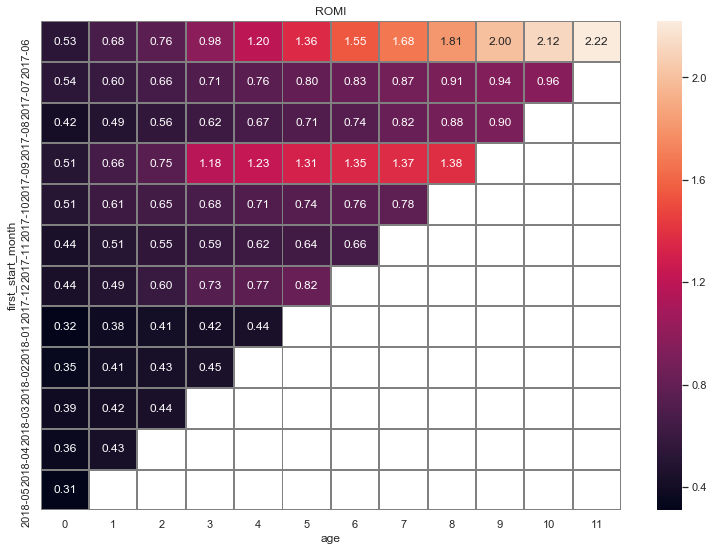

In [133]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')    

In [134]:
output.mean(axis=0).round(2)

age
0     0.43
1     0.52
2     0.58
3     0.71
4     0.80
5     0.91
6     0.98
7     1.10
8     1.24
9     1.28
10    1.54
11    2.22
dtype: float64

**Заключение по разделу** На итоговом графике (карте) видно, что в общей сумме только по двум когортам 7-17 и 9-17 вышли на окупаемость, хотя в целом к одиннадцатому месяцу вышли в плюс.  

### Общий вывод

 - Перед проведением анализа были просмотрены представленные файлы, удалены записи с нулевыми и не входящими в заданный диапазон записями. Текстовые значения дат переведены в формат даты.
 - При анализе пользовательской активности были посчитаны метрики:DAU = 907, WAU = 5716, MAU = 23228. С их графиками можно ознакомиться в разделе 2.1.1. На графиках выделяются 2 всплеска: в плюс в ноябре17 и в минус в марте18.
 - Количество подключений в день редко бывает больше 1 раза, наиболее частая продолжитеьность подключений - 60 сек.
 - При применении когортного анализа был рассчитан Retention Rate.Выяснилось, что самой стабильной оказалась самая ранняя когорта, но во всех когортах идет постепенный спад. График представлен в разделе 2.1.4.
 - Был рассчитан Churn Rate,можно сделать выводы, что спрос более-менее стабильный и зависит от календарного месяца.График в 2.1.5.
 - Время от знакомства с приложением  до первой поупки варьируется от минуты до почти до года. Но самое частое - 60сек.
 - Среднее количество покупок на 1 пользователя с июля по декабрь 2017 - 1.3.
 - Средний чек за этот же период - 5.6 у.е.  
 - Средний накопительный LTV за 6 мес. - 6.91.График в разделе 2.2.4.
 - Со сводным отчетом по расходам в разрезе по источникам можно ознакомиться в разделе 2.3.1. Расчет CAC показывает, что больше всего потрачено на 2 и 3 источники 13.40 и 14.02 у.е. на покупателя.    
 - Графики ROMI по источникам представлены в разделе 2.3.3.
-    1-ый источник окупается от 0 до 4мес.(когорта 12-17), общая-с 4-ого месяца.
-    2-ой источник окупается со 3,4-го месяца(когорты 06-17 и 9-12-17)  и далее до конца года, общая - ч 9-ого месяца.
-    3-ий источник вообще не окупился(может слишком много затрат на него?)
-    4-ый в плюсе только 2 когорты 11-17 со2-ого, а 6-17 только с 6-ого месяца.В общем - нет. 
-     5-ый не раньше 3-его месяца(6-8-9-17) -  далеко не все когорты. В общем - нет.
-     по 6,7,8 источникам покупок не было. Точнее, 1 покупка с 7-ого источника(desktop) перенесена в 1-ый, потому что на него не было затрат.
-      9-ый источник, 4 первых когорты, а в 10-м почти все в минусе.9-ый окупается с 7-ого, а 10-ый только 2 когорты (06-17,03-18), в целом - нет.
- В заключение был посчитан ROMI без учета источников, выяснилось, что окупаемость в целом достигнута  к 8-му месяцу.

